<a href="https://colab.research.google.com/github/johanaluna/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module1-join-and-reshape-data/LS_DS7_121_Join_and_Reshape_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [2]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-08-13 02:32:17--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.169.197
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.169.197|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.4’

instacart_online_gr 100%[===================>] 196.03M  57.4MB/s    in 3.4s    

2019-08-13 02:32:20 (57.4 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.4’ saved [205548478/205548478]



In [3]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
n 
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [4]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [5]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [0]:
##### Clean and Check Data #####
import pandas as pd
import numpy as np

In [0]:
#Save data in Data frames
aisles= pd.read_csv('aisles.csv')
departments= pd.read_csv('departments.csv')
order_products__prior = pd.read_csv('order_products__prior.csv')
order_products__train= pd.read_csv('order_products__train.csv')
orders= pd.read_csv('orders.csv')
products= pd.read_csv('products.csv')

In [8]:
#Print Data frame shape to check if the date is complete
print('aisles',aisles.shape,'departments',departments.shape ,'order_products__prior',order_products__prior.shape, 'order_products__train',order_products__train.shape)
print('orders',orders.shape, 'products',products.shape)

aisles (134, 2) departments (21, 2) order_products__prior (32434489, 4) order_products__train (1384617, 4)
orders (3421083, 7) products (49688, 4)


In [9]:
#List columns to check what are the columns that we need
print('aisles:',list(aisles.columns))
print('\ndepartments:',list(departments.columns))
print('\norder_products__prior:',list(order_products__prior.columns))
print('\norder_products__train:',list(order_products__train.columns))
print('\norders:',list(orders.columns))
print('\nproducts:',list(products.columns))

aisles: ['aisle_id', 'aisle']

departments: ['department_id', 'department']

order_products__prior: ['order_id', 'product_id', 'add_to_cart_order', 'reordered']

order_products__train: ['order_id', 'product_id', 'add_to_cart_order', 'reordered']

orders: ['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']

products: ['product_id', 'product_name', 'aisle_id', 'department_id']


FROM **orders** :
* order_id
* user_id
* order_number
* order_dow
* order_hour_of_day

FROM **products** :
* product_id
* product_name



In [10]:
# concatenation( order_products__prior and order_products__train) and create a order_set
order_set= pd.concat([order_products__prior, order_products__train])
order_set.shape

(33819106, 4)

In [11]:
order_set.head()# show data

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [12]:
###CREATE 1 TABLE with ALL the information that we need###
# create a test data to make the code easy to handle

order_setp = order_set[(order_set['order_id'] ==2) | (order_set['order_id'] ==3) ]
print(order_setp.shape)
order_setp

(17, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


In [13]:
### MERGE ###
#Merge order_set with orders by order_id then merge that result with products by product_id

result = pd.merge(pd.merge(order_set[['order_id','product_id','add_to_cart_order']],
                 orders[['order_id', 'user_id', 'order_number','order_dow','order_hour_of_day']],
                 on='order_id',how='inner'),products[['product_id','product_name']],on='product_id',how='inner')
print(result.shape)
result.head()

(33819106, 8)


,order_id,product_id,add_to_cart_order,user_id,order_number,order_dow,order_hour_of_day,product_name
0,2,33120,1,202279,3,5,9,Organic Egg Whites
1,26,33120,5,153404,2,0,16,Organic Egg Whites
2,120,33120,13,23750,11,6,8,Organic Egg Whites
3,327,33120,5,58707,21,6,9,Organic Egg Whites
4,390,33120,28,166654,48,0,12,Organic Egg Whites


In [14]:
result.head(20)

,order_id,product_id,add_to_cart_order,user_id,order_number,order_dow,order_hour_of_day,product_name
0,2,33120,1,202279,3,5,9,Organic Egg Whites
1,26,33120,5,153404,2,0,16,Organic Egg Whites
2,120,33120,13,23750,11,6,8,Organic Egg Whites
3,327,33120,5,58707,21,6,9,Organic Egg Whites
4,390,33120,28,166654,48,0,12,Organic Egg Whites
5,537,33120,2,180135,15,2,8,Organic Egg Whites
6,582,33120,7,193223,6,2,19,Organic Egg Whites
7,608,33120,5,91030,11,3,21,Organic Egg Whites
8,623,33120,1,37804,63,3,12,Organic Egg Whites
9,689,33120,4,108932,16,1,13,Organic Egg Whites


In [0]:
#Count values and take from that list the top 10
top10=(result['product_name'].value_counts()[0:10]).to_frame()

In [16]:
print(top10)

                        product_name
Banana                        491291
Bag of Organic Bananas        394930
Organic Strawberries          275577
Organic Baby Spinach          251705
Organic Hass Avocado          220877
Organic Avocado               184224
Large Lemon                   160792
Strawberries                  149445
Limes                         146660
Organic Whole Milk            142813


In [0]:
top10 = top10.reset_index() # reset index because we need the product name as a column

In [0]:
top10=top10.rename(columns={"index": "product_name", "product_name": "frequency "}) #rename columns

In [19]:
print(top10)

             product_name  frequency 
0                  Banana      491291
1  Bag of Organic Bananas      394930
2    Organic Strawberries      275577
3    Organic Baby Spinach      251705
4    Organic Hass Avocado      220877
5         Organic Avocado      184224
6             Large Lemon      160792
7            Strawberries      149445
8                   Limes      146660
9      Organic Whole Milk      142813


In [20]:
most_freq=pd.merge(result,
                 top10[['product_name']],
                 on='product_name',how='inner')
most_freq.head(10) #extract all the trasaction of the more frequent products

,order_id,product_id,add_to_cart_order,user_id,order_number,order_dow,order_hour_of_day,product_name
0,3,21903,4,205970,16,5,17,Organic Baby Spinach
1,26,21903,6,153404,2,0,16,Organic Baby Spinach
2,31,21903,3,201744,7,6,15,Organic Baby Spinach
3,39,21903,4,184886,8,5,18,Organic Baby Spinach
4,56,21903,8,41591,8,0,12,Organic Baby Spinach
5,57,21903,1,34016,1,6,8,Organic Baby Spinach
6,73,21903,4,152590,13,0,12,Organic Baby Spinach
7,92,21903,2,56022,13,6,9,Organic Baby Spinach
8,113,21903,4,128979,2,3,12,Organic Baby Spinach
9,135,21903,5,55179,13,2,12,Organic Baby Spinach


In [0]:
#pivot table 
pivot_hour=most_freq.pivot_table(index='product_name', columns='order_hour_of_day', values='order_id',aggfunc=np.sum,fill_value=0).apply(lambda x:100 * x / float(x.sum())).round(2)
pivot_hour['hour_max_orders']=pivot_hour.idxmax(axis=1) 

In [22]:
#print(type(pivot_hour['Max_orders']))
pivot_hour=pivot_hour.T
pivot_hour

product_name,Bag of Organic Bananas,Banana,Large Lemon,Limes,Organic Avocado,Organic Baby Spinach,Organic Hass Avocado,Organic Strawberries,Organic Whole Milk,Strawberries
order_hour_of_day,,,,,,,,,,
0,17.29,18.03,6.28,6.25,7.74,11.66,9.11,11.54,5.96,6.14
1,17.77,18.61,6.21,6.29,7.14,12.02,9.36,11.31,5.32,5.97
2,18.60,18.65,6.89,5.97,7.40,10.82,8.73,10.88,5.72,6.33
3,18.59,19.27,7.35,5.87,7.05,11.79,9.68,10.17,4.49,5.73
4,17.13,19.65,7.47,6.24,6.94,10.98,9.35,10.82,4.51,6.93
5,16.13,21.00,6.72,5.30,6.23,10.96,9.27,11.94,5.46,6.98
6,16.24,21.34,5.81,5.18,6.89,10.05,8.81,12.55,6.71,6.41
7,16.56,20.64,5.62,4.99,6.77,10.11,9.07,12.68,6.97,6.58
8,16.95,20.88,6.11,5.30,7.03,9.99,8.81,11.81,6.65,6.48


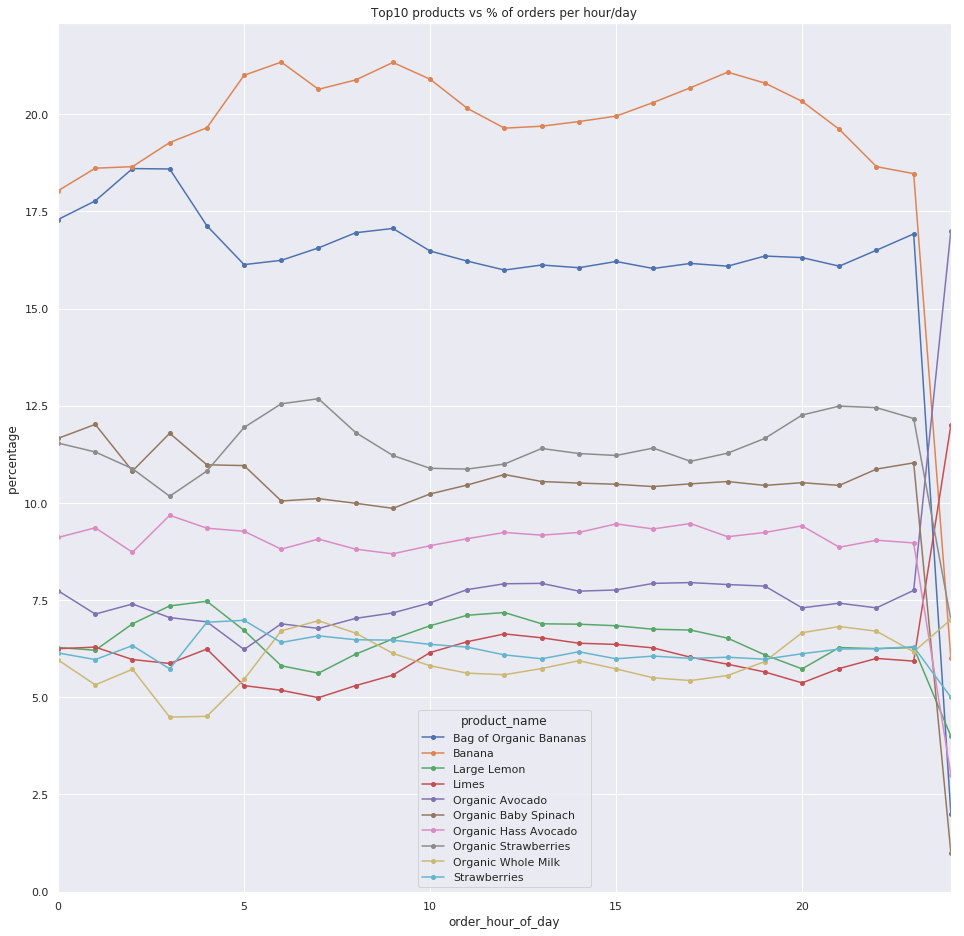

In [24]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()  # use Seaborn styles
pivot_hour.plot( figsize=(16, 16),marker='o',markersize=4);
plt.ylabel('percentage ');
plt.title('Top10 products vs % of orders per hour/day');

## Reshape Data Section

- Replicate the lesson code
- Complete the code cells we skipped near the beginning of the notebook
- Table 2 --> Tidy
- Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [0]:
import seaborn as sns
flights = sns.load_dataset('flights') #import dataset

In [26]:
print(flights.shape) #show shape of data
flights.head(20)


(144, 3)


,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
5,1949,June,135
6,1949,July,148
7,1949,August,148
8,1949,September,136
9,1949,October,119


In [0]:
flights.columns.to_list()

In [27]:
#Create a pivot table with the data 
pivot_flights=flights.pivot_table(index='year', columns='month', values='passengers')
pivot_flights

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


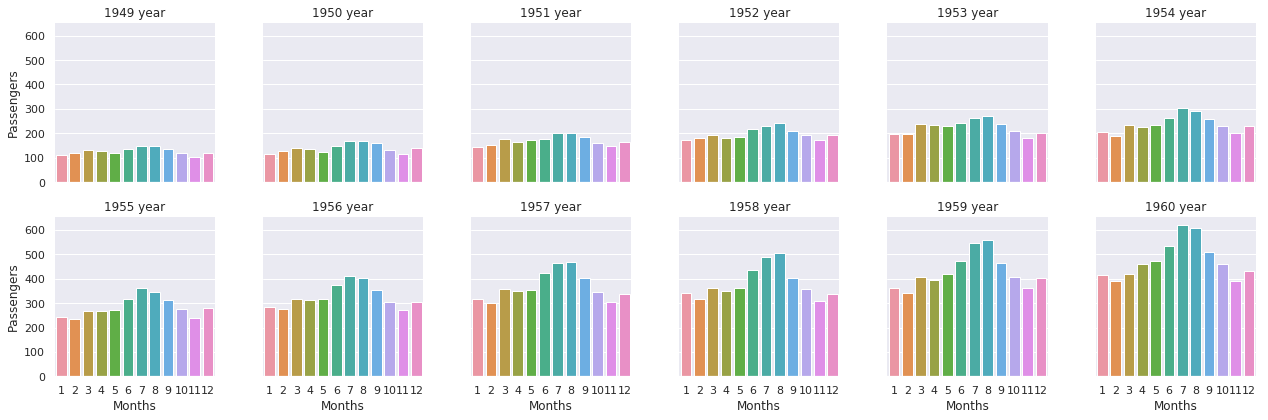

In [29]:
#Creat a seabonr grah with the date 
import matplotlib.pyplot as plt

g=sns.catplot(x='month', y='passengers', col='year', 
            kind='bar', data=flights, height=3,legend=True,col_wrap=6,margin_titles=True);
(g.set_axis_labels("Months", "Passengers"))
g.set_xticklabels(["1", "2", "3","4","5","6","7","8","9","10","11","12"])#Change month by numbers
g.set_titles("{col_name} {col_var}")

g.despine(left=True);

## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [0]:
##### YOUR CODE HERE #####

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
##### YOUR CODE HERE #####